In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001028918"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001028918
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,PACIFIC PREMIER BANCORP INC
Ticker,PPBI


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,6.0,1.623167e+01,1.212960e+01,7.33,7.422500e+00,9.59,2.655500e+01,3.197000e+01
interest income,60.0,2.809053e+07,3.159421e+07,6331000.00,1.144100e+07,13381500.00,2.925975e+07,1.360210e+08
net income,71.0,5.741915e+06,8.506423e+06,-1244000.00,1.219000e+06,2632000.00,5.811000e+06,3.964300e+07
net interest income,68.0,2.081568e+07,2.676574e+07,3752000.00,5.401500e+06,10696500.00,1.870650e+07,1.152880e+08
provision for loan losses,65.0,9.846154e+05,8.439541e+05,0.00,2.960000e+05,664000.00,1.589000e+06,4.013000e+06


# Plots

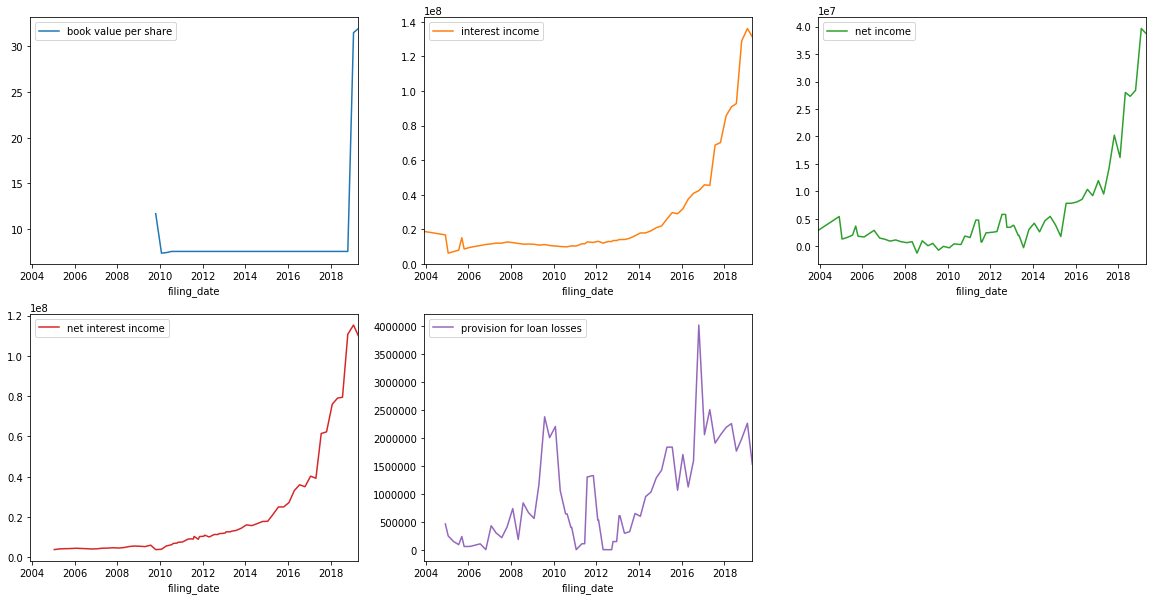

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001028918 book value per share       2002Q4 to 2009Q2: 27 periods    missing   
           book value per share       2010Q3 to 2018Q3: 33 periods    missing   
           interest income             2003Q1 to 2004Q2: 6 periods    missing   
           interest income                                  2005Q2  duplicate   
           interest income                                  2006Q1    missing   
           net income                  2003Q1 to 2004Q2: 6 periods    missing   
           net income                                       2005Q2  duplicate   
           net income                                       2006Q1    missing   
           net interest income         2002Q4 to 2004Q3: 8 periods    missing   
           net interest income                              2006Q1    missing   
           provision for loan losses   2002Q4 to 2004Q2: 7 periods    missing   
           provision for loan losses                        2005Q2  duplicate   
           provision for loan losses                        2006Q1    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001028918 book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           interest income                Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()